**USED CAR PRICE PREDICTION**

**Problem Definition**

This is the first step of machine learning life cycle.Here we analyse what kind of problem is, how to solve it. So for this project we are using a car dataset, where we want to predict the selling price of car based on its certain features. Since we need to find the real value, with real calculation, therefore this problem is regression problem. We will be using regression machine learning algorithms to solve this problem.

In [2]:
import requests
import csv
from bs4 import BeautifulSoup

url = 'https://www.carvana.com/cars'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

cars = soup.find_all('div', class_='vehicle-tile')

with open('carvana_cars.csv', mode='w', newline='') as csv_file:
    fieldnames = ['Make', 'Model', 'Year', 'Selling_price'. 'Present_price', 'Kilometers', ' Fuel', ' Transmission', 'owner']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()

    for car in cars:
        name = car.find('div', class_='vehicle-tile-name').text.strip()
        model = car.find('div', class_='vehicle-tile-model').text.strip()
        year = car.find('div', class_='vehicle-tile-year').text.strip()
        Selling_price = car.find('div', class_='vehicle-tile-Selling_price').text.strip()
        Present_price = car.find('div', class_='vehicle-tile-Present_ price').text.strip()
        Kilometers = car.find('div', class_='vehicle-tile-Kms driven').text.strip()
        Fuel = car.find('div', class_='vehicle-tile-Fuel_type').text.strip()
        Transmission = car.find('div', class_='vehicle-tile-Transmission').text.strip()
        owner = car.find('div', class_='vehicle-tile-owner').text.strip()
        print(f"Name: {name}, Model: {model}, Year: {year}, Price: {price}, Kilometers: {Kilometers}, Fuel: {Fuel}, Transmission: {Transmission}, owner: {owner}")


        writer.writerow({'Name': name, 'Model': model, 'Year': year, 'Selling_Price': Selling_price, 'Kilometers': Kilometers, 'Fuel': Fuel, 'Transmission': 'Transmission', owner: 'owner'")
})


The above code scrapes the data from carvana website based on the given attributes like vehicle make, model, year, price and store it in a csv file named Carvana_cars.csv

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

**Data Gathering**

In [5]:
#load dataset
df = pd.read_csv("carvana_cars.csv")

In [6]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Data Preparation**

In [8]:
#basic information about dataset
df.shape

(301, 9)

In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#basic statistical information
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
#finding is there any missing value
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [13]:
#unique values
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [14]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [15]:
df = df.drop('Car_Name', axis=1)

In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Feature Engineering**

In [17]:
#adding another column
df['current_year']=2021
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [18]:
df['no_of_years']=df['current_year']-df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [19]:
df.drop('Year',axis=1,inplace=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [21]:
#one hot encoding
final_df = pd.get_dummies(df,drop_first=True)

In [22]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


**Pair plot**

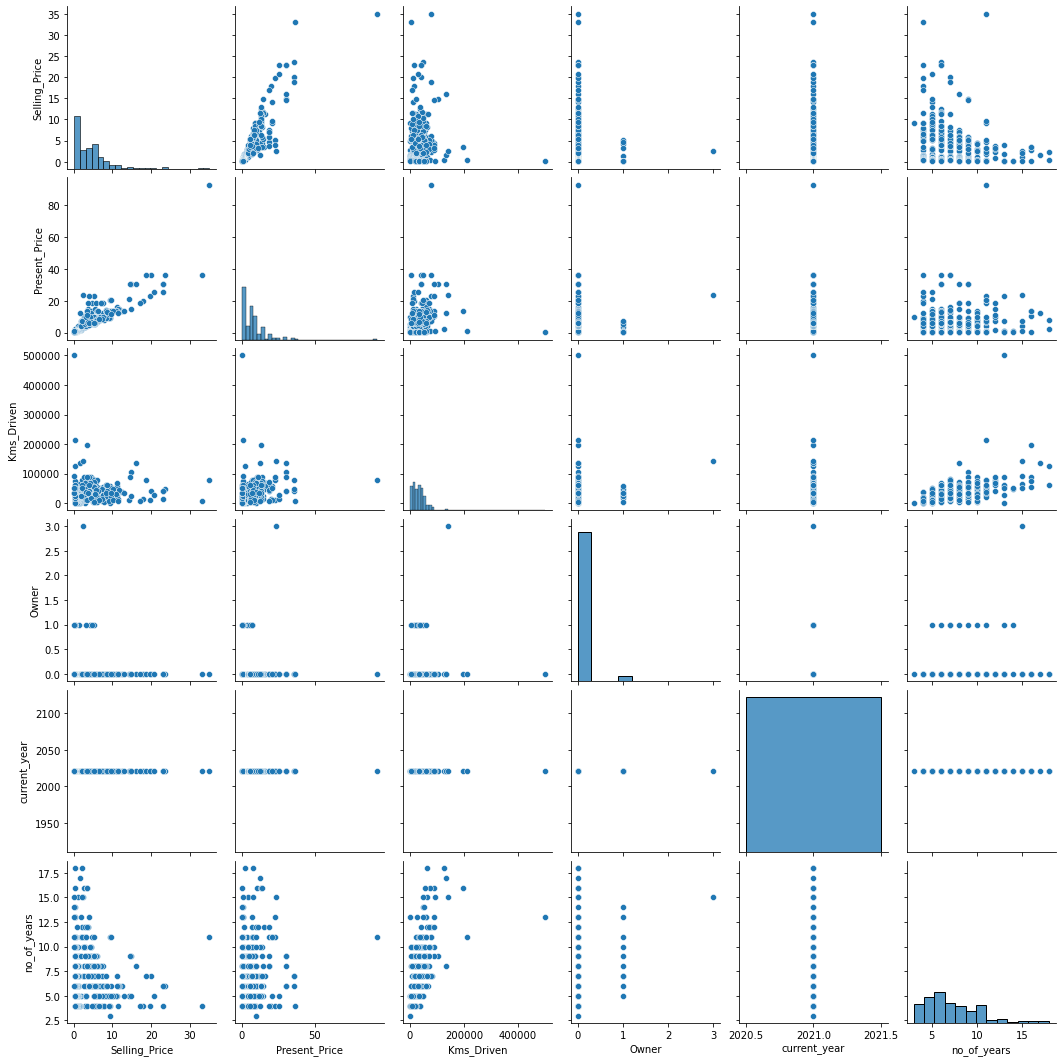

In [23]:
#to see pairwise relationships on our dataset we will check pairplot from seaborn library
sns.pairplot(df)

In [24]:
#correlation
final_df.drop('current_year',axis=1,inplace=True)
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


**Heatmap**

<AxesSubplot:>

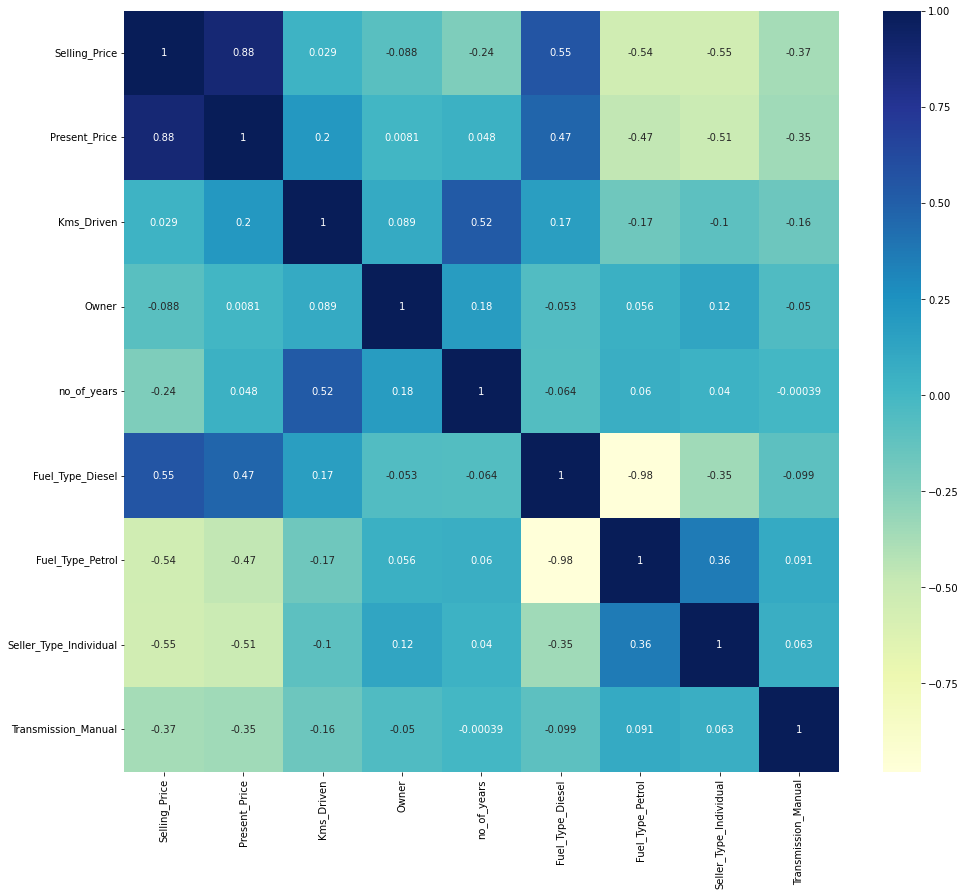

In [25]:
corr=final_df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

**Features and target variable**

In [26]:
# taking all the features except "selling price"
X=final_df.iloc[:,1:]
# taking "selling price" as y , as it is our target variable
y=final_df.iloc[:,0]

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

**Splitting the dataset into training and testing**

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Fitting and evaluating different models**

Here I am using three models :

1.Linear Regression

2.Decision Tree

3.Random forest Regressor

I will fit these models and then choose one with the better accuracy. 

**Linear Regression Model**

In [27]:
from sklearn.linear_model import LinearRegression
#creating object for linear regression
reg=LinearRegression()
#fitting the linear regression model
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

#metrics
from sklearn import metrics
#print mean absolute error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print mean squared error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print the root mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print R2 metrics score
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 1.2426713915033711
MSE: 4.432128265667618
RMSE: 2.105262042043132
R2: 0.8517983059778264


**Decision Tree Model**

In [28]:
from sklearn.tree import DecisionTreeRegressor

#creating object for Decision tree
tree = DecisionTreeRegressor()

#fitting the decision tree model
tree.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = tree.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.8376923076923077
MSE: 2.487023076923077
RMSE: 1.577029827531197
R2: 0.9168388162573362


**Random Forest Model**

In [29]:
from sklearn.ensemble import RandomForestRegressor

#creating object for Random forest regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#fitting the rf model
rf.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = rf.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7659494505494507
MSE: 2.6934987619780197
RMSE: 1.6411882164998686
R2: 0.9099346734922075


We want our R2 score to be maximum and other errors to be minimum for better results.

Random forest regressor is giving better results. Therefore, we will hypertune this model and then fit, predict.

**Hyperparameter tuning**

In [30]:
#n_estimators = The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [32]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=1)

In [34]:
#fit the random forest model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [35]:
#displaying the best parameters
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 700}

In [36]:
rf_random.best_score_

-3.692367540823068

**Final Predictions**

In [37]:
#predicting against test data
y_pred=rf_random.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7770866417940175
MSE: 2.6391724911675425
RMSE: 1.624553012729207
R2: 0.9117512376531293


**Data Visualization**

BAR PLOTS


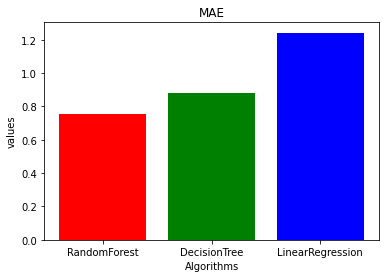

In [38]:
MAE=[0.756,0.882,1.242]
A=[1,2,3]
plt.bar(A,MAE,tick_label=['RandomForest','DecisionTree','LinearRegression'],color=['red','green','blue'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('MAE')
plt.show()

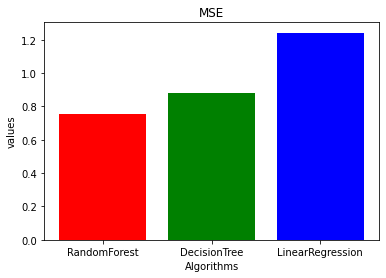

In [39]:
MSE=[2.690,2.634,4.242]
A=[1,2,3]
plt.bar(A,MAE,tick_label=['RandomForest','DecisionTree','LinearRegression'],color=['red','green','blue'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('MSE')
plt.show()

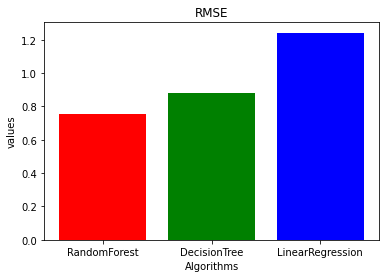

In [40]:
RMSE=[1.64,1.62,2.105]
A=[1,2,3]
plt.bar(A,MAE,tick_label=['RandomForest','DecisionTree','LinearRegression'],color=['red','green','blue'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('RMSE')
plt.show()

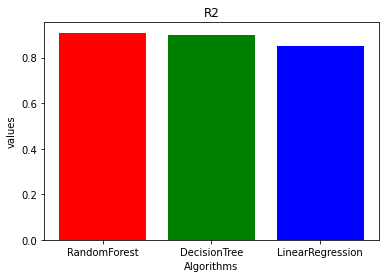

In [41]:
R2=[0.909,0.901,0.851]
A=[1,2,3]
plt.bar(A,R2,tick_label=['RandomForest','DecisionTree','LinearRegression'],color=['red','green','blue'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('R2')
plt.show()



Hence, Random forest regressor is giving better results. So, it is the best fit model.